In [10]:
# Cell 1: Setup
from data_loader import *
import matplotlib.pyplot as plt


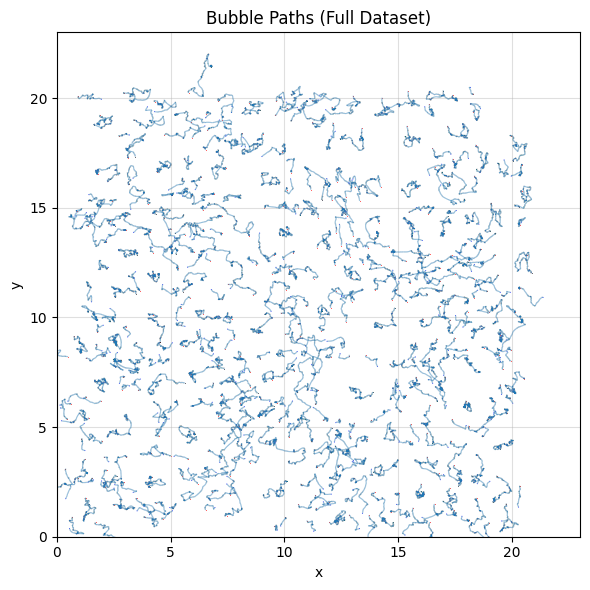

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection

# ---- Build sorted copy like before ----
df_sorted = df_corrected.sort_values(["id", "timestep"]).copy()

x = df_sorted["x"].to_numpy()
y = df_sorted["y"].to_numpy()
ids = df_sorted["id"].to_numpy()

# Segments: only where consecutive rows are same id
same_bubble = ids[1:] == ids[:-1]
x0 = x[:-1][same_bubble]
y0 = y[:-1][same_bubble]
x1 = x[1:][same_bubble]
y1 = y[1:][same_bubble]
segments = np.stack(
    [np.column_stack([x0, y0]), np.column_stack([x1, y1])],
    axis=1
)

# Start / end points
starts = df_sorted.groupby("id").head(1)
ends   = df_sorted.groupby("id").tail(1)

# Marker size heuristic as before
x_span = df_corrected["x"].max() - df_corrected["x"].min()
y_span = df_corrected["y"].max() - df_corrected["y"].min()
marker_size = 0.5 * (10.0 / max(x_span, y_span))
s_val = marker_size**2

fig, ax = plt.subplots(figsize=(6, 6))  # square, like your original

# Paths
lc = LineCollection(segments, linewidths=0.8, alpha=0.5)
ax.add_collection(lc)

# Start points: red x
ax.scatter(starts["x"], starts["y"],
           marker="x", s=s_val, c="red", linewidths=0.5)

# Endpoints
ends_disappear = ends[ends["id"].isin(disappearing_ids)]
ends_survive   = ends[~ends["id"].isin(disappearing_ids)]

ax.scatter(ends_disappear["x"], ends_disappear["y"],
           s=s_val, facecolors="none", edgecolors="blue", linewidths=0.4)
ax.scatter(ends_survive["x"], ends_survive["y"],
           s=s_val, facecolors="blue", edgecolors="black", linewidths=0.4)

# ---- Make axes behave like before ----
# If you want a *square* box of side BOX_SIZE:
ax.set_xlim(0, BOX_SIZE+3)
ax.set_ylim(0, BOX_SIZE+3)

ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title("Bubble Paths (Full Dataset)")
ax.grid(alpha=0.4)
ax.set_aspect("auto")  
plt.tight_layout()
plt.show()

In [12]:
""" marker_size = 3

# Zoomed Region 
plt.figure(figsize=(8,6))

for bubble_id, g in df_corrected.groupby("id"):
    g = g.sort_index()
    x, y = g["x"].to_numpy(), g["y"].to_numpy()
    
    plt.plot(x, y, alpha=0.5, lw=0.8)
    plt.plot(x[0], y[0], 'rx', markersize=marker_size**2)
    
    if bubble_id in disappearing_ids:
        plt.plot(x[-1], y[-1], 'o', markersize=marker_size**2,
                markerfacecolor="none", markeredgecolor="blue")
    else:
        plt.plot(x[-1], y[-1], 'o', markersize=marker_size**2,
                markerfacecolor="blue", markeredgecolor="black")


plt.xlabel("x")
plt.ylabel("y")
plt.title("Bubble Paths (Zoomed)")
plt.axis("square")
plt.grid(alpha=0.4)
# plt.savefig("Figures/bubble_paths_zoomed.png", dpi=300)
plt.xlim(19.3, 20)
plt.ylim(2.5, 3.2)
plt.show() """

' marker_size = 3\n\n# Zoomed Region \nplt.figure(figsize=(8,6))\n\nfor bubble_id, g in df_corrected.groupby("id"):\n    g = g.sort_index()\n    x, y = g["x"].to_numpy(), g["y"].to_numpy()\n    \n    plt.plot(x, y, alpha=0.5, lw=0.8)\n    plt.plot(x[0], y[0], \'rx\', markersize=marker_size**2)\n    \n    if bubble_id in disappearing_ids:\n        plt.plot(x[-1], y[-1], \'o\', markersize=marker_size**2,\n                markerfacecolor="none", markeredgecolor="blue")\n    else:\n        plt.plot(x[-1], y[-1], \'o\', markersize=marker_size**2,\n                markerfacecolor="blue", markeredgecolor="black")\n\n\nplt.xlabel("x")\nplt.ylabel("y")\nplt.title("Bubble Paths (Zoomed)")\nplt.axis("square")\nplt.grid(alpha=0.4)\n# plt.savefig("Figures/bubble_paths_zoomed.png", dpi=300)\nplt.xlim(19.3, 20)\nplt.ylim(2.5, 3.2)\nplt.show() '